In [1]:
# Enable further imports

import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import matplotlib.pyplot as plt
import torch

from data import BiasedCifar10

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(device)

cpu


In [4]:
p_y_a = [
    [0.9 if i == j else 0.1 / 9 for i in range(10)]
    for j in range(10)
]
p_a = [1/10] * 10

data_dir = os.path.join(project_root, "data/datasets")
biased_cifar = BiasedCifar10(data_dir, p_y_a, train=True, download=True, seed=42)

Files already downloaded and verified


Image shape: torch.Size([3, 32, 32])
Spurious attribute: tensor(5)
True label: tensor(9)


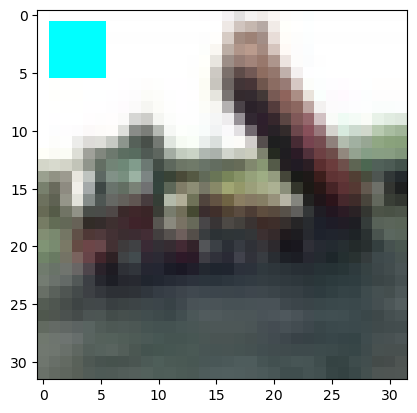

In [5]:
img, attr, label = biased_cifar[2]
print("Image shape:", img.shape)
print("Spurious attribute:", attr)
print("True label:", label)

plt.imshow(img.permute(1, 2, 0).cpu().numpy())
plt.show()

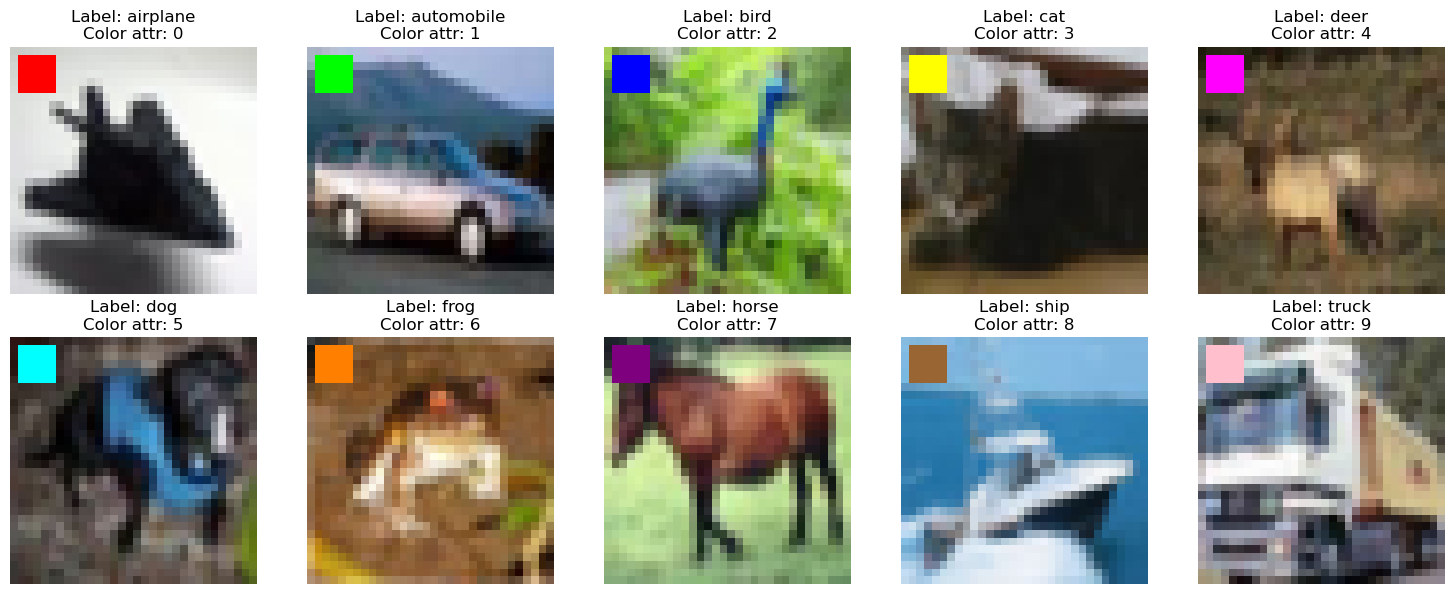

In [6]:
cifar10_classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

seen_labels = set()
examples = []

for i in range(len(biased_cifar)):
    img, attr, label = biased_cifar[i]
    label_int = int(label)
    if label_int not in seen_labels:
        seen_labels.add(label_int)
        examples.append((img, int(attr), label_int))
    if len(seen_labels) == 10:
        break

examples.sort(key=lambda x: x[1])  # sort by attr

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i, (img, attr, label) in enumerate(examples):
    axs[i].imshow(img.permute(1, 2, 0).cpu().numpy())
    axs[i].axis('off')
    axs[i].set_title(f"Label: {cifar10_classes[label]}\nColor attr: {attr}")

plt.tight_layout()
plt.show()
